In [ ]:
# TABLE 1 CLEAN UP

In [14]:
import os
import csv
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib notebook                 

In [15]:
#Open reosurces file
datafile_csv = os.path.join("Resources", "Raw Data", "Table 1 - US-oilexports.csv")

In [16]:
# Read csv
table1_data = pd.read_csv(datafile_csv, header=0, skiprows=2)

# Extract column of interest
table1_df = pd.DataFrame(table1_data, columns= ['Date','U.S. Exports of Crude Oil (Thousand Barrels)'])
table1_df.head(10)

,Date,U.S. Exports of Crude Oil (Thousand Barrels)
0,Jan-1920,469.0
1,Feb-1920,853.0
2,Mar-1920,892.0
3,Apr-1920,693.0
4,May-1920,761.0
5,Jun-1920,627.0
6,Jul-1920,723.0
7,Aug-1920,553.0
8,Sep-1920,790.0
9,Oct-1920,777.0


In [17]:
date = table1_df["Date"]
crude_export = table1_df["U.S. Exports of Crude Oil (Thousand Barrels)"]

# Since date is in MMM-YYYY format, convert to dtype Datetime64[ns]
date_64ns = pd.to_datetime(table1_df["Date"])


In [18]:
# Get rid of the minutes and seconds
formated_date_list = []

for item in date_64ns:
    date_clean = str(item)[:10]
    formated_date_list.append(date_clean)


In [19]:
# Create new data, Date is in datetime type
working_df =  pd.DataFrame({
                        "Date": formated_date_list,
                        "U.S. Exports of Crude Oil (Thousand Barrels)": crude_export
                       })



#Drop NaN rows
working_df.dropna(inplace=True) 
working_df.head()

,Date,U.S. Exports of Crude Oil (Thousand Barrels)
0,1920-01-01,469.0
1,1920-02-01,853.0
2,1920-03-01,892.0
3,1920-04-01,693.0
4,1920-05-01,761.0


In [20]:
# Convert date to datetime dtype and format YY-MM-DD
working_df['Date_dt']=pd.to_datetime(working_df['Date'], format='%Y-%m-%d')

In [27]:
#Set start date
sdate = dt.datetime(2005,1,1)   # start date
edate = dt.datetime(2019,12,30)   # end date

working_df[(working_df['Date_dt']>=sdate ) & (working_df['Date_dt']<= edate)]
table1_transformed = working_df[["Date_dt", "U.S. Exports of Crude Oil (Thousand Barrels)"]]
table1_transformed

,Date_dt,U.S. Exports of Crude Oil (Thousand Barrels)
0,1920-01-01,469.0
1,1920-02-01,853.0
2,1920-03-01,892.0
3,1920-04-01,693.0
4,1920-05-01,761.0
...,...,...
1188,2019-01-01,79830.0
1189,2019-02-01,83721.0
1190,2019-03-01,83196.0
1191,2019-04-01,85276.0


<IPython.core.display.Javascript object>


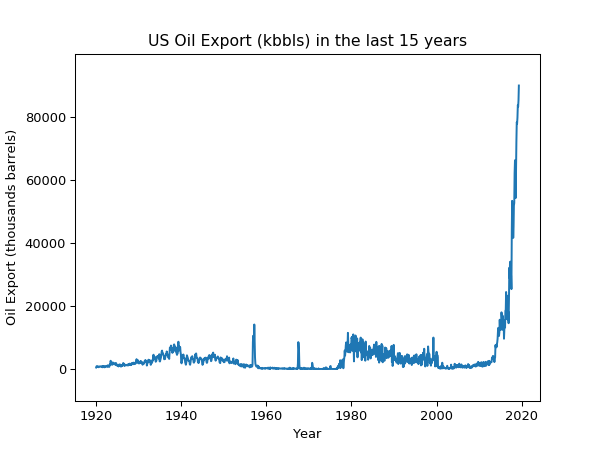

<function matplotlib.pyplot.show(*args, **kw)>

In [24]:
plt.plot(table1_transformed["Date_dt"], table1_transformed['U.S. Exports of Crude Oil (Thousand Barrels)'] )
plt.title("US Oil Export (kbbls) in the last 15 years")
plt.ylim(min(table1_transformed['U.S. Exports of Crude Oil (Thousand Barrels)']) - 10000,
         max(table1_transformed['U.S. Exports of Crude Oil (Thousand Barrels)']) + 10000)
plt.xlabel("Year")
plt.ylabel("Oil Export (thousands barrels)")
         
plt.show

In [18]:
# This analysis only includes Crude Oil and exclude NG exports

In [ ]:
# -------------------------------------------------------------------------------------------------------------------

In [19]:
# TABLE 3 CLEAN UP

In [20]:
# -------------------------------------------------------------------------------------------------------------------

In [21]:
# TABLE 7 CLEAN UP

In [ ]:
# -------------------------------------------------------------------------------------------------------------------